# Mehta, Vedant Homework 4

In this homework you will compute the posterior distribution for an exponential likelihood with a gamma prior using:
* Model Conjugacy
* Numerical Integration
* Metropolis Hastings Algorithm

All of these methods should give the same answer (up to numerical approximation). In practice, one would use the conjugate model result to derive the posterior because this method is computationally fastest. However the  methods of numerical integration and Metropolis Hastings are more general in that they could be used on other, non-conjugate models. Metropolis Hastings is particularly useful because it can be used for problems where the parameter dimension is too high for direct numerical integration. 

## Problem 1

Suppose we observe $X_1,\ldots,X_n \sim f(x|\lambda)$ where $f(x|\lambda)$ is an exponential distribution with rate parameter $\lambda$. Specifically
$$ f(x|\lambda) = \lambda e^{-\lambda x}$$
for $x \geq 0$. We put a $Gamma(\alpha,\beta)$ prior $\pi(\lambda)$ on $\lambda$. This prior has the form
$$\pi(\lambda) = \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha-1} e^{-\beta\lambda}$$
for $\lambda > 0$. Recall that $\alpha$ and $\beta$ are fixed, known constants.

1. Using a few lines of algebra determine that the posterior distribution is $Gamma(\alpha' = n + \alpha,\beta' = \sum x_i + \beta)$.
2. Plot the Gamma prior probability density with $\alpha=3$, $\beta=1/2$ and plot the posterior density assuming $n=10$ and `[0.16265459,0.64434542, 0.00794972, 1.01595712, 1.31977252,0.08782853, 0.10424722, 0.50344791, 0.29815325, 0.73709422]`.


Note: In python, `np.random.exponential`, `np.random.gamma`, `scipy.stats.gamma`, `scipy.stats.expon` use the scale parameterization. We use the rate parameterization. rate = 1/scale. R uses the rate parameterization in `rexp`, `dexp`, etc. and has options for both rate and scale parameterization in `rgamma`, `dgamma`, etc. See [here](https://en.wikipedia.org/wiki/Exponential_distribution) and [here](https://en.wikipedia.org/wiki/Gamma_distribution) for some discussion of different parameterizations.

### Question 1, subquestion 1

\begin{align*}
P(\lambda|X) &\propto P(X|\lambda)P(\lambda)\\
&\propto \lambda^{n} e^{-\lambda\sum_i x_i}\lambda^{\alpha-1}e^{-\beta\lambda}\\
&\propto e^{-\lambda(\sum_i x_i + \beta)} \lambda^{n+\alpha-1}
\end{align*}

So from last step we can see that posterior distribution $P(\lambda|X) \propto e^{-\lambda(\sum_i x_i + \beta)} \lambda^{n+\alpha-1}$.

Hence, posterior distribution is $Gamma(\alpha' = n + \alpha,\beta' = \sum x_i + \beta)$

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
np.random.seed(seed=689)
n = 10
lambdat = 2.0 
x = np.random.exponential(1.0/lambdat,size=n)
x

array([0.16265459, 0.64434542, 0.00794972, 1.01595712, 1.31977252,
       0.08782853, 0.10424722, 0.50344791, 0.29815325, 0.73709422])

In [3]:
np.mean(x)

0.4881450532031405

In [4]:
## prior parameters
alpha = 3
beta = 1/2

In [5]:
## posterior parameters
alphaprime = alpha + n
betaprime = np.sum(x) + beta

In [6]:
plt.rcParams['figure.figsize'] = (11, 3)

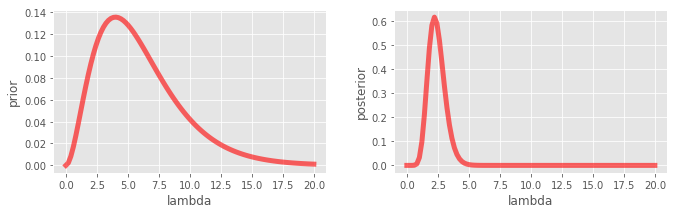

In [7]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=.25)

lmbda = np.linspace(0,20,100)

### plot the prior
ax = fig.add_subplot(1, 2, 1)
ax.plot(lmbda, scipy.stats.gamma.pdf(lmbda,a=alpha,scale=1/beta),
         'r-', lw=5, alpha=0.6, label='beta pdf')
ax.set(xlabel='lambda', ylabel='prior');


### plot the posterior
ax = fig.add_subplot(1, 2, 2)
ax.plot(lmbda, scipy.stats.gamma.pdf(lmbda,a=alphaprime,scale=1/betaprime),
         'r-', lw=5, alpha=0.6, label='beta pdf')
ax.set(xlabel='lambda', ylabel='posterior');

## Problem 2

The posterior is proportional to

In [8]:
sumx = np.sum(x)

In [9]:
def postp(lmbda):
    return scipy.stats.gamma.pdf(lmbda,a=alpha,scale=1/beta)*np.power(lmbda,n)*np.exp(-lmbda*sumx)

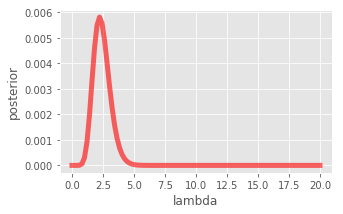

In [10]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=.25)

lmbda = np.linspace(0,20,100)

### plot the prior
ax = fig.add_subplot(1, 2, 1)
ax.plot(lmbda, postp(lmbda),
         'r-', lw=5, alpha=0.6, label='beta pdf')
ax.set(xlabel='lambda', ylabel='posterior');

## Problem 3

Write (or adapt code from class) a Metropolis Hastings algorithm to sample from the posterior. Draw a histogram of the samples and verify that they approximately match the posterior determined using conjugacy or numerical integration. Compute the posterior mean and make a 95% credible interval for $\lambda$ (you can make this interval many ways, but the most popular method is to compute the 0.025 and .975 quantiles of the posterior samples). You can verify that you have the right answer by computing the interval from the conjugacy result in problem 1.

In [11]:
## an simple implementation Metropolis Hastings algorithm
Niter = 50000
chain = np.zeros(Niter)
chain[0] = 0.3

In [12]:
for ii in np.arange(Niter-1):
        prop = chain[ii] + np.random.normal(loc=0.0,scale=0.5,size=1)
        if (postp(prop) / postp(chain[ii])) > np.random.uniform():
            chain[ii+1] = prop
        else:
            chain[ii+1] = chain[ii]

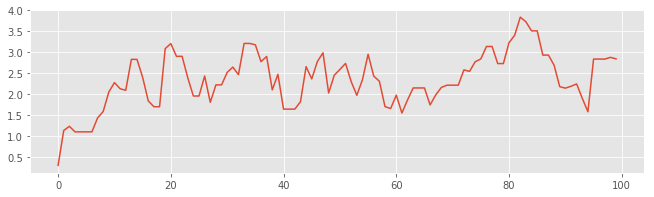

In [13]:
## the chain takes 40+ iterations to converge to a steady state
## usually much longer for more realistic problems
## this is known as burn in
fig = plt.figure()
ax = plt.axes()
plt.plot(np.arange(100), chain[:100]);

In [14]:
## remove the first 1000 iterations to get rid of burn in
chain = chain[1000:]

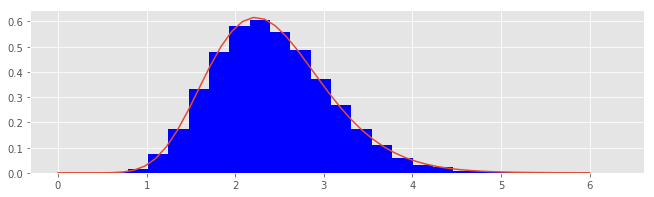

In [15]:
fig = plt.figure()
ax = plt.axes()
ns, bins, rectangles = ax.hist(chain,25,normed=True,color='blue')
p = np.linspace(.5,.85,100);
lmbda = np.linspace(0,6)
plt.plot(lmbda, scipy.stats.gamma.pdf(lmbda,a=alphaprime,scale=1/betaprime));

The posterior computed with metropolis looks very similar to the posterior computed using the conjugate result.

In [16]:
chain_s = np.sort(chain)
ixL = np.floor(np.size(chain_s)*.025).astype(int) ## lower index
ixU = np.floor(np.size(chain_s)*.975).astype(int) ## upper index

The lower bound for a 95% credible interval is

In [17]:
chain_s[ixL]

1.281229716429615

The upper bound for a 95% credible interval is

In [18]:
chain_s[ixU]

3.848574990957724

To verify that these are the correct numbers we use the ppf functions

In [19]:
lhs = scipy.stats.gamma.ppf(0.025, a=alphaprime, scale=1/betaprime)
rhs = scipy.stats.gamma.ppf(0.975, a=alphaprime, scale=1/betaprime)
print(lhs)
print(rhs)

1.2862614735196465
3.895155204606947


Posterior mean from conjugacy and Metropolis are very close as well.

In [20]:
np.mean(chain)

2.417818867595017

In [21]:
alphaprime / betaprime

2.415705565371559